In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [6]:
house_df = pd.read_csv("kc_house_data.csv")
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
house_df = house_df.drop(['id', 'date'],axis=1)
house_df.dtypes

,0
price,float64
bedrooms,int64
bathrooms,float64
sqft_living,int64
sqft_lot,int64
floors,float64
waterfront,int64
view,int64
condition,int64
grade,int64


<Axes: title={'center': 'Pearson Correlation of features'}>

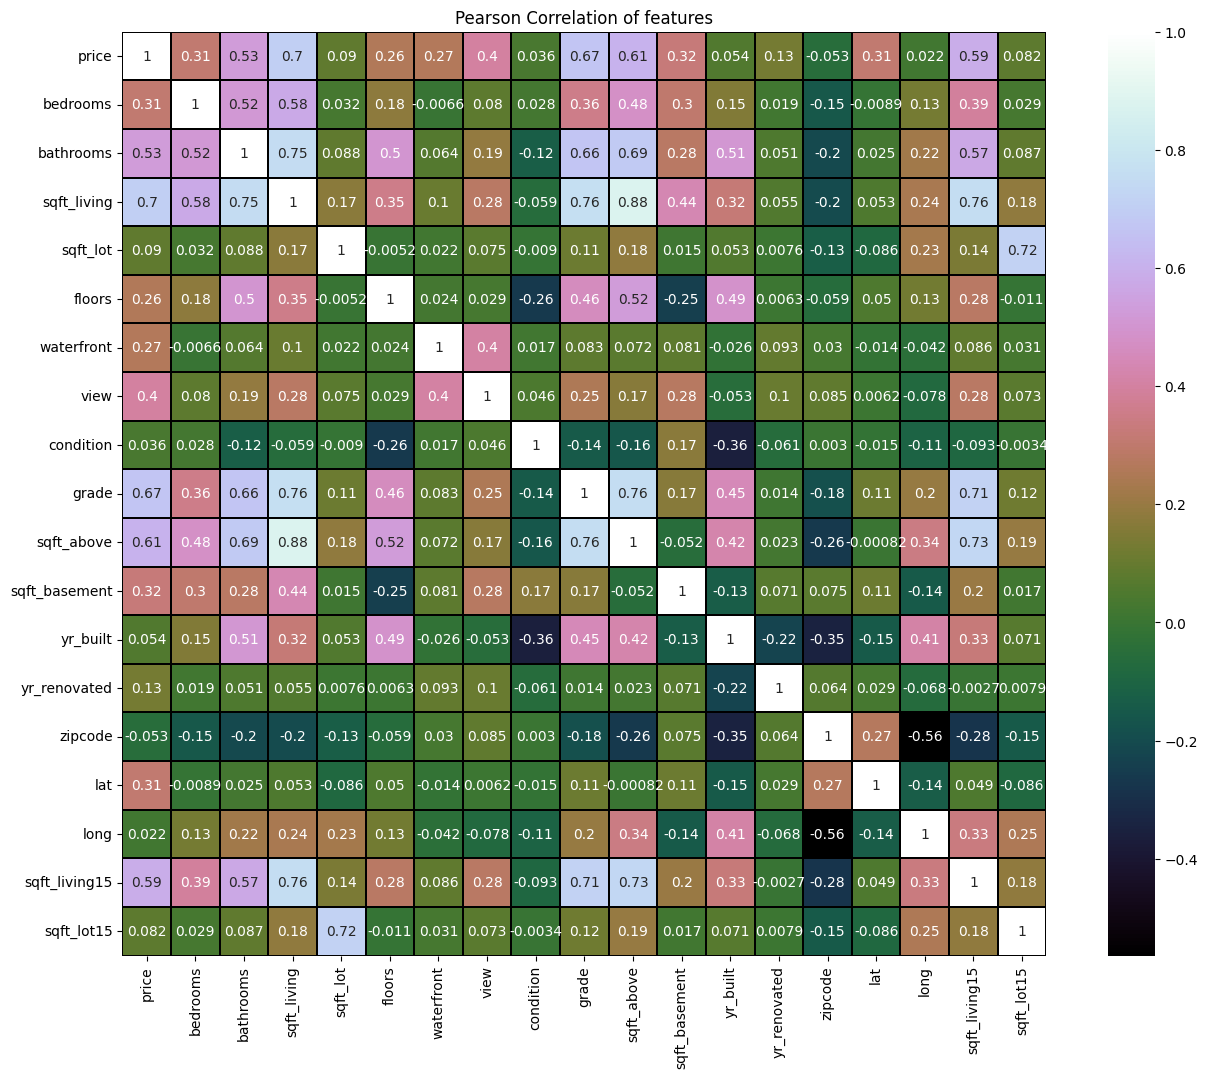

In [9]:
str_list = []
for colname, colvalue in house_df.items():
    if type(colvalue[1]) == str:
         str_list.append(colname)
num_list = house_df.columns.difference(str_list)
house_num = house_df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')

sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [12]:
Y = house_df.price.values
house_df = house_df.drop(['price'], axis=1)
X = house_df.values
colnames = house_df.columns

In [17]:
ranks = {}

def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

rlasso = Lasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.coef_), colnames)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.982e+14, tolerance: 2.913e+11
  model = cd_fast.enet_coordinate_descent(


In [19]:
lr = LinearRegression()
lr.fit(X,Y)
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [20]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    9.1s


building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.7s finished


In [21]:
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name]
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str,
                         [ranks[method][name] for method in methods]))))

	RF	RFE	rlasso/Stability	Mean
bedrooms	0.0	0.59	0.06	0.22
bathrooms	0.02	0.71	0.07	0.27
sqft_living	0.88	0.35	0.0	0.41
sqft_lot	0.04	0.0	0.0	0.01
floors	0.0	0.47	0.01	0.16
waterfront	0.08	1.0	0.97	0.68
view	0.03	0.76	0.09	0.29
condition	0.0	0.65	0.04	0.23
grade	1.0	0.88	0.16	0.68
sqft_above	0.06	0.29	0.0	0.12
sqft_basement	0.01	0.24	0.0	0.08
yr_built	0.08	0.53	0.0	0.2
yr_renovated	0.0	0.12	0.0	0.04
zipcode	0.04	0.41	0.0	0.15
lat	0.51	0.94	1.0	0.82
long	0.22	0.82	0.36	0.47
sqft_living15	0.1	0.18	0.0	0.09
sqft_lot15	0.04	0.06	0.0	0.03


<ipython-input-29-8d335bda1398>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar",


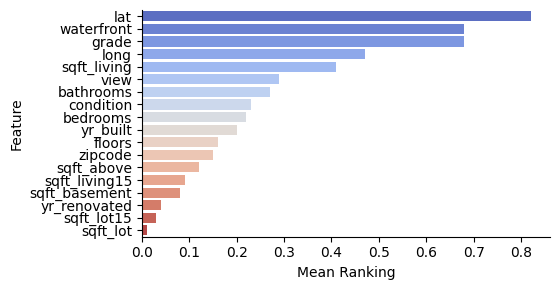

In [29]:
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
sns.catplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar",
               height=3, aspect=1.9, palette='coolwarm')